In [2]:
import cv2#默认读取BGR格式
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
img = cv2.imread('cat.jpeg')

In [4]:
img

array([[[ 27,  69,  34],
        [ 24,  66,  31],
        [ 21,  63,  28],
        ...,
        [ 96, 159, 109],
        [ 98, 161, 111],
        [ 94, 160, 109]],

       [[ 26,  66,  31],
        [ 24,  66,  31],
        [ 23,  63,  28],
        ...,
        [ 96, 159, 109],
        [ 97, 163, 112],
        [ 94, 160, 109]],

       [[ 27,  64,  30],
        [ 27,  67,  32],
        [ 27,  64,  30],
        ...,
        [ 93, 156, 106],
        [ 94, 160, 108],
        [ 91, 159, 106]],

       ...,

       [[141, 166, 176],
        [150, 175, 185],
        [139, 164, 174],
        ...,
        [155, 169, 181],
        [145, 159, 171],
        [129, 143, 155]],

       [[140, 166, 173],
        [140, 166, 173],
        [135, 161, 168],
        ...,
        [189, 203, 215],
        [176, 190, 202],
        [145, 159, 171]],

       [[127, 153, 160],
        [137, 163, 170],
        [139, 165, 172],
        ...,
        [193, 207, 219],
        [169, 183, 195],
        [143, 157, 169]]

In [11]:
def img_show(img):
    b, g , r = cv2.split(img)# 分割出三个通道
    img2 = cv2.merge([r, g ,b]) # 合并为新的图片
    plt.imshow(img2) # 使用plt显示



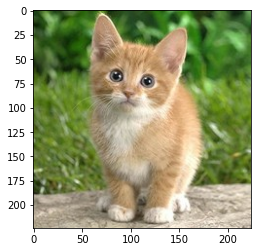

In [12]:
img_show(img) # 调用函数显示图片

In [14]:
img.shape

(224, 224, 3)

In [16]:
# 读取灰度图像
img = cv2.imread('cat.jpeg',cv2.IMREAD_GRAYSCALE)
img

array([[ 54,  51,  48, ..., 137, 139, 137],
       [ 51,  51,  48, ..., 137, 140, 137],
       [ 50,  52,  50, ..., 134, 137, 135],
       ...,
       [166, 175, 164, ..., 171, 161, 145],
       [165, 165, 160, ..., 205, 192, 161],
       [152, 162, 164, ..., 209, 185, 159]], dtype=uint8)

In [17]:
img.shape

(224, 224)

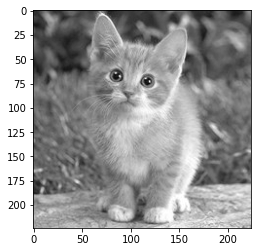

In [22]:
plt.imshow(img, cmap="gray")# 调用函数显示图片

In [23]:
cv2.imwrite('mycat.png',img)

True

In [26]:
type(img)

numpy.ndarray

In [28]:
img.size

50176

In [30]:
img.dtype

dtype('uint8')

In [31]:
vc = cv2.VideoCapture('video.mp4')

In [34]:
#检查是否正确打开
if vc.isOpened():
    open, frame = vc.read()
else:
    open = False

In [35]:
open

True

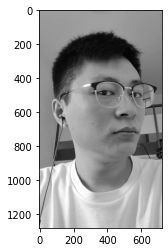

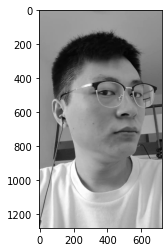

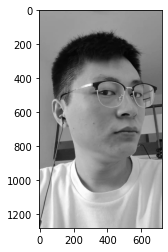

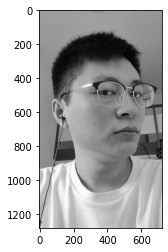

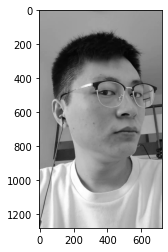

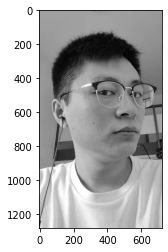

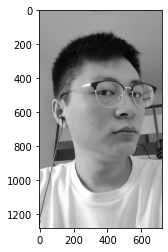

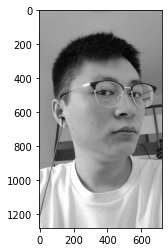

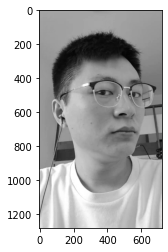

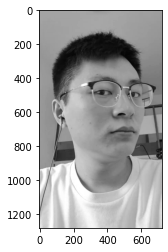

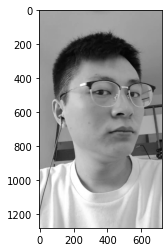

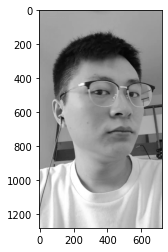

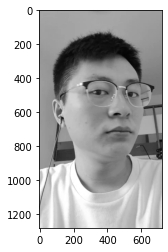

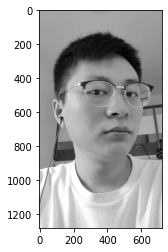

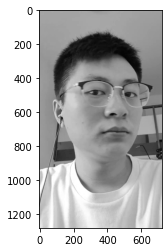

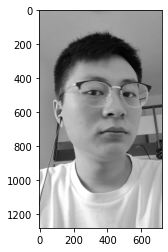

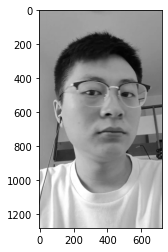

KeyboardInterrupt: 

In [39]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret ==True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         plt.imshow(gray, cmap="gray")# 调用函数显示图片
        plt.imshow(gray, cmap="gray")
#         plt.pause(1)  #显示秒数
#         plt.close()
# vc.release()
# cv2.destroyAllWindows()


### 截取部分图像数据

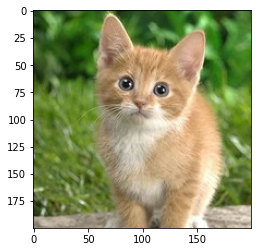

In [41]:
img = cv2.imread('cat.jpeg')
cat = img[0:200,0:200]
img_show(cat)#猫的角没了


### 颜色通道的提取


In [42]:
b,g,r = cv2.split(img)

In [45]:
g

array([[ 69,  66,  63, ..., 159, 161, 160],
       [ 66,  66,  63, ..., 159, 163, 160],
       [ 64,  67,  64, ..., 156, 160, 159],
       ...,
       [166, 175, 164, ..., 169, 159, 143],
       [166, 166, 161, ..., 203, 190, 159],
       [153, 163, 165, ..., 207, 183, 157]], dtype=uint8)

In [46]:
g.shape

(224, 224)

In [49]:
img = cv2.merge((b,g,r))#再凑回去

In [50]:
img.shape

(224, 224, 3)

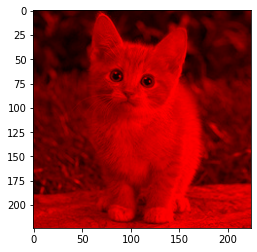

In [54]:
#只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
img_show(cur_img)

### 边界填充

In [55]:
top_size, bottom_size, left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size,left_size, right_size, borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size,left_size, right_size, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size,left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size,left_size, right_size, cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img, top_size, bottom_size,left_size, right_size, cv2.BORDER_CONSTANT, value = 0)


(<AxesSubplot:title={'center':'constant'}>, None, Text(0.5, 1.0, 'constant'))

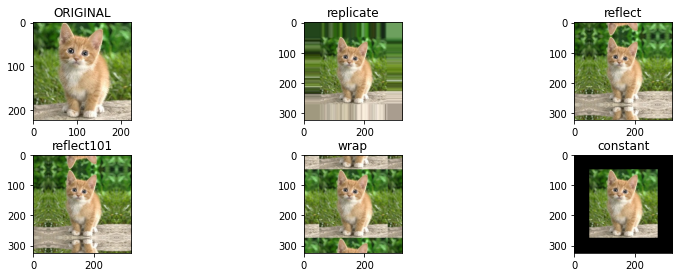

In [68]:
plt.subplots_adjust(left=0.225,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.subplot(231), img_show(img),plt.title('ORIGINAL')
plt.subplot(232), img_show(replicate),plt.title('replicate')
plt.subplot(233), img_show(reflect),plt.title('reflect')
plt.subplot(234), img_show(reflect101),plt.title('reflect101')
plt.subplot(235), img_show(wrap),plt.title('wrap')
plt.subplot(236), img_show(constant),plt.title('constant')

### 数值计算

In [69]:
img_cat = cv2.imread('cat.jpeg')

In [71]:
img_cat2 =img_cat+10

In [75]:
img_cat[:5,:,0]#只打印前五行

array([[27, 24, 21, ..., 96, 98, 94],
       [26, 24, 23, ..., 96, 97, 94],
       [27, 27, 27, ..., 93, 94, 91],
       [25, 26, 25, ..., 84, 87, 87],
       [28, 24, 22, ..., 78, 82, 82]], dtype=uint8)

In [76]:
img_cat2[:5,:,0]#只打印前五行

array([[ 37,  34,  31, ..., 106, 108, 104],
       [ 36,  34,  33, ..., 106, 107, 104],
       [ 37,  37,  37, ..., 103, 104, 101],
       [ 35,  36,  35, ...,  94,  97,  97],
       [ 38,  34,  32, ...,  88,  92,  92]], dtype=uint8)

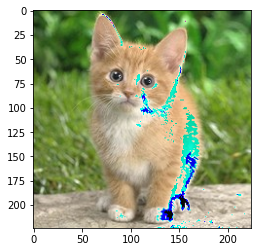

In [74]:
img_show(img_cat2)

In [77]:
(img_cat2+img_cat)[:5,:,0]

array([[ 64,  58,  52, ..., 202, 206, 198],
       [ 62,  58,  56, ..., 202, 204, 198],
       [ 64,  64,  64, ..., 196, 198, 192],
       [ 60,  62,  60, ..., 178, 184, 184],
       [ 66,  58,  54, ..., 166, 174, 174]], dtype=uint8)

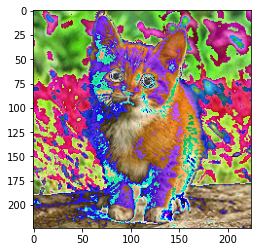

In [78]:
img_show(img_cat2+img_cat)#超过256溢出

In [79]:
cv2.add(img_cat,img_cat2)[:5,:,0]#这里越界取最大，没越界取自身

array([[ 64,  58,  52, ..., 202, 206, 198],
       [ 62,  58,  56, ..., 202, 204, 198],
       [ 64,  64,  64, ..., 196, 198, 192],
       [ 60,  62,  60, ..., 178, 184, 184],
       [ 66,  58,  54, ..., 166, 174, 174]], dtype=uint8)

图像融合 图像的shape得是相同的，这里提供了resize

In [81]:
img_cat3 = cv2.resize(img_cat,(400,300))#注意这里输出的shape 应该是300,400
img_cat3.shape

(300, 400, 3)

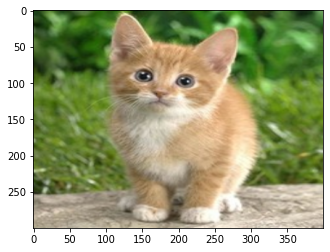

In [83]:
img_show(img_cat3)

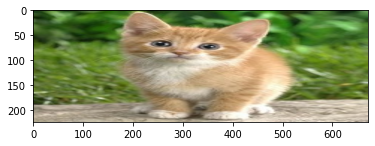

In [84]:
img_ca4 = cv2.resize(img_cat,(0,0),fx=3,fy=1)#这里是改变倍数
img_show(img_ca4)

In [87]:
dog = cv2.imread('dog.png')

In [88]:
dog.shape

(370, 561, 3)

In [91]:
dog2 = cv2.resize(dog,(224,224))

In [92]:
dog2.shape

(224, 224, 3)

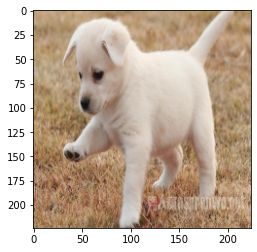

In [96]:
img_show(dog2)

In [90]:
img_cat.shape

(224, 224, 3)

图像相加是用 R =a倍的x1+ b倍的x2 = a*x1 + b*x2 + c 偏执项

In [93]:
res = cv2.addWeighted(img_cat,0.4,dog2,0.6,0)

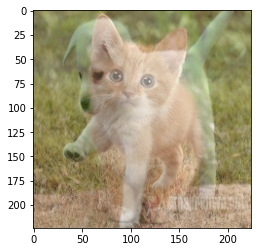

In [94]:
img_show(res)